In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

 # Bike Details Dataset

In [372]:
# Load dataset
bike_data = pd.read_csv('BIKE_DETAILS.csv')

In [373]:
bike_data.shape

(1061, 7)

In [374]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


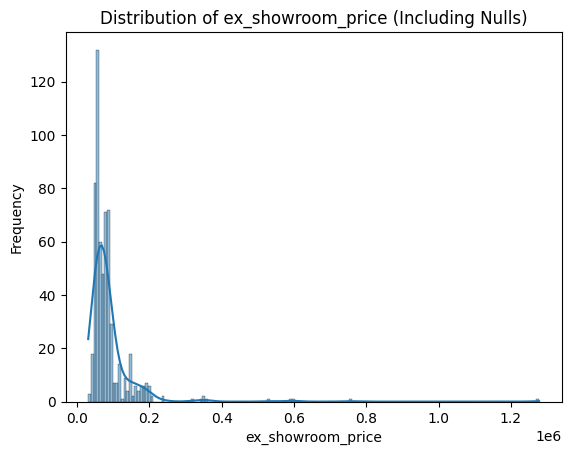

In [375]:
sns.histplot(bike_data['ex_showroom_price'], kde=True)
plt.title('Distribution of ex_showroom_price (Including Nulls)')
plt.xlabel('ex_showroom_price')
plt.ylabel('Frequency')
plt.show()

In [376]:

median_value = bike_data['ex_showroom_price'].median()


bike_data['ex_showroom_price'] = bike_data['ex_showroom_price'].fillna(median_value)


print(f"Null values in 'ex_showroom_price' have been filled with the median: {median_value}")
print(bike_data['ex_showroom_price'].isnull().sum())


Null values in 'ex_showroom_price' have been filled with the median: 72752.5
0


In [377]:
# Q1: What is the range of selling prices in the dataset ?

min_price = bike_data['selling_price'].min()
max_price = bike_data['selling_price'].max()
selling_price_range = (min_price, max_price)

print(f"The range of selling prices in the dataset is from {min_price} to {max_price}.")


The range of selling prices in the dataset is from 5000 to 760000.


In [378]:
# Q2: B What is the median selling price for bikes in the dataset ?

print("The median selling price for bikes in the dataset is", bike_data['selling_price'].median())


The median selling price for bikes in the dataset is 45000.0


In [379]:
# Q3 What is the most common seller type ?

print("The most common seller type in the dataset is", bike_data['seller_type'].mode()[0])


The most common seller type in the dataset is Individual


In [380]:
#  Q4 How many bikes have driven more than 50,000 kilometers ?

bikes_above_50000_km = bike_data[bike_data['km_driven'] > 50000].shape[0]
print("The number of bikes driven more than 50,000 km is", bikes_above_50000_km)


The number of bikes driven more than 50,000 km is 170


In [381]:
# Q5 What is the average km_driven value for each ownership type ?

avg_km_driven_by_owner = bike_data.groupby('owner')['km_driven'].mean().to_dict()
print("The average km driven by ownership type is:", avg_km_driven_by_owner)


The average km driven by ownership type is: {'1st owner': 32816.583333333336, '2nd owner': 39288.9918699187, '3rd owner': 33292.181818181816, '4th owner': 311500.0}


In [382]:
# Q6 What proportion of bikes are from the year 2015 or older ?

bikes_2015_or_older = bike_data[bike_data['year'] <= 2015].shape[0]
proportion_bikes_2015_or_older = bikes_2015_or_older / bike_data.shape[0]
print(f"The proportion of bikes from 2015 or older is {proportion_bikes_2015_or_older:.2f}")


The proportion of bikes from 2015 or older is 0.57


In [383]:
# Q7 What is the trend of missing values across the dataset ?

missing_values = bike_data.isnull().sum()

print("The missing values trend in the dataset:")
for column, count in missing_values.items():
    print(f"{column}: {count}")


The missing values trend in the dataset:
name: 0
selling_price: 0
year: 0
seller_type: 0
owner: 0
km_driven: 0
ex_showroom_price: 0


In [384]:
# Q8 What is the highest ex_showroom_price recorded, and for which bike ?

if 'ex_showroom_price' in bike_data.columns:
    max_ex_showroom_row = bike_data.loc[bike_data['ex_showroom_price'].idxmax()]
    print(f"The highest ex-showroom price is {max_ex_showroom_row['ex_showroom_price']} for the bike '{max_ex_showroom_row['name']}'.")
else:
    print("The 'ex_showroom_price' column is not present in the dataset.")


The highest ex-showroom price is 1278000.0 for the bike 'Harley-Davidson Street Bob'.


In [385]:
# Q9 What is the total number of bikes listed by each seller type ?

bikes_by_seller_type = bike_data['seller_type'].value_counts().to_dict()

print("Total bikes by seller type:")
for seller_type, count in bikes_by_seller_type.items():
    print(f"{seller_type}: {count}")


Total bikes by seller type:
Individual: 1055
Dealer: 6


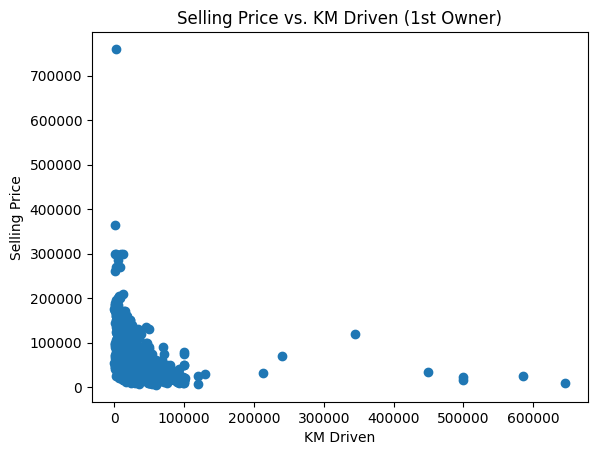

In [386]:
# Q10 What is the relationship between selling_price and km_driven for first-owner bikes ?

first_owner_data = bike_data[bike_data['owner'] == '1st owner']
plt.scatter(first_owner_data['km_driven'], first_owner_data['selling_price'])
plt.title('Selling Price vs. KM Driven (1st Owner)')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.show()

Interpreting the Relationship:

1. Scatter Plot:

X-axis (KM Driven): Represents the number of kilometers driven by the bike.
Y-axis (Selling Price): Represents the price at which the bike is being sold.

2. Expected Trend:

Negative Correlation:

Typically, as the number of kilometers driven increases, the selling price tends 
to decrease. This is because higher mileage often indicates more wear and tear, 
leading to lower resale value.


Outliers:

There may be some bikes with high mileage but a relatively high selling price, 
which could indicate factors like good maintenance, popularity, or rarity of the 
bike.

3. Cluster:

Bikes with lower mileage may cluster at the higher end of the price range, 
while bikes with higher mileage may be found toward the lower end.

In [387]:
# Q11 Identify and remove outliers in the km_driven column  using the IQR method ?

Q1 = bike_data['km_driven'].quantile(0.25)
Q3 = bike_data['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = bike_data[(bike_data['km_driven'] >= lower_bound) & (bike_data['km_driven'] <= upper_bound)]
print(filtered_data.head())


                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350            72752.5  
1  1st owner       5650            72752.5  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000            72752.5  


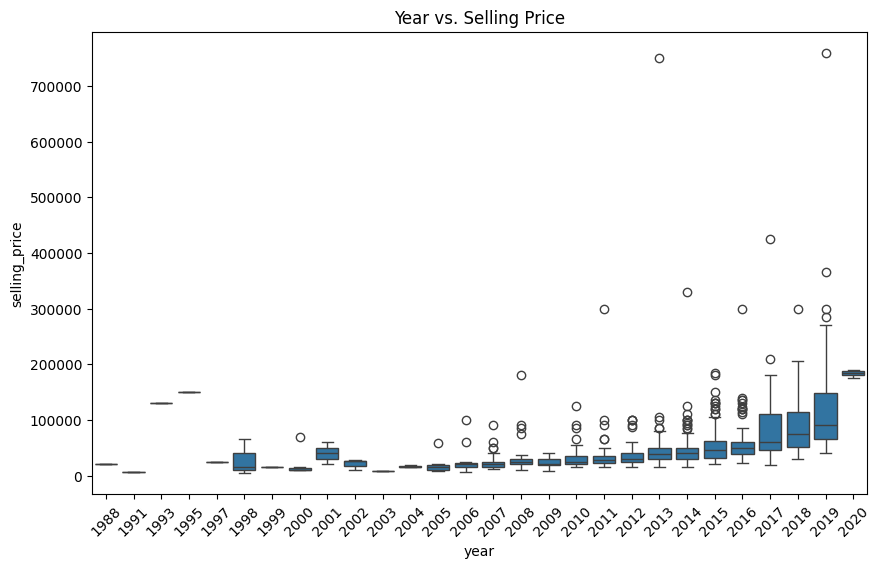

In [388]:
# Q12 Perform a bivariate analysis to visualize the relationship between year and selling_price

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='year', y='selling_price')
plt.xticks(rotation=45)
plt.title('Year vs. Selling Price')
plt.show()


In [389]:
# Q13  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year) ?

current_year = 2025

filtered_data['age'] = current_year - filtered_data['year']

avg_depreciation = (filtered_data['selling_price'] / filtered_data['age']).groupby(filtered_data['year']).mean()

print("Average depreciation based on bike's age:")
print(avg_depreciation)


Average depreciation based on bike's age:
year
1988      540.540541
1991      176.470588
1993     4062.500000
1995     5000.000000
1997      892.857143
1998     1049.382716
1999      576.923077
2000      833.333333
2001     1666.666667
2002      898.550725
2003      363.636364
2004      761.904762
2005      848.928571
2006     1253.739612
2007     1542.676768
2008     2141.411765
2009     1433.423913
2010     2156.725146
2011     2566.501232
2012     2781.350816
2013     4316.901408
2014     4465.577120
2015     5631.313131
2016     6436.014024
2017     9870.265152
2018    12522.910578
2019    19948.251938
2020    36666.666667
dtype: float64


In [390]:
# Q14 Which bike names are priced significantly above the average price for their manufacturing year ?

yearly_avg_price = filtered_data.groupby('year')['selling_price'].mean()

filtered_data = filtered_data.merge(yearly_avg_price, on='year', suffixes=('', '_avg'))

outliers = filtered_data[filtered_data['selling_price'] > 1.5 * filtered_data['selling_price_avg']]


outlier_bikes = outliers['name'].unique()

print("Bikes priced significantly above average price by year:")
print(outlier_bikes)

Bikes priced significantly above average price by year:
['Yamaha YZF R3' 'Jawa Standard' 'Royal Enfield Continental GT 650'
 'Royal Enfield Interceptor 650' 'Bajaj Dominar 400' 'KTM 250 Duke'
 'KTM RC 390' 'Suzuki GSX S750' 'TVS Apache RR310' 'Honda CBR-250R'
 'KTM RC 200' 'KTM 390 Duke' 'Mahindra Mojo XT300'
 'Royal Enfield Classic Desert Storm' 'Yamaha FZ25'
 'Royal Enfield Classic 350' 'Royal Enfield Thunderbird 350'
 'Kawasaki Ninja 650 [2018-2019]' 'UM Renegade Commando'
 'Royal Enfield Himalayan' 'KTM 200 Duke'
 'Royal Enfield Classic Squadron Blue' 'Benelli TNT 25' 'KTM RC390'
 'Royal Enfield Classic Gunmetal Grey' 'Royal Enfield Thunderbird 350X'
 'Bajaj Dominar 400 [2018]' 'BMW G310GS'
 'Royal Enfield Classic Stealth Black' 'Royal Enfield Classic Signals'
 'Yamaha Fazer 25' 'Royal Enfield Thunderbird 500X'
 'Royal Enfield Thunder 500' 'KTM 390 Duke ABS [2013-2016]'
 'Royal Enfield Bullet 500' 'Royal Enfield Classic Chrome'
 'Royal Enfield Bullet 350' 'Royal Enfield Thunder 350

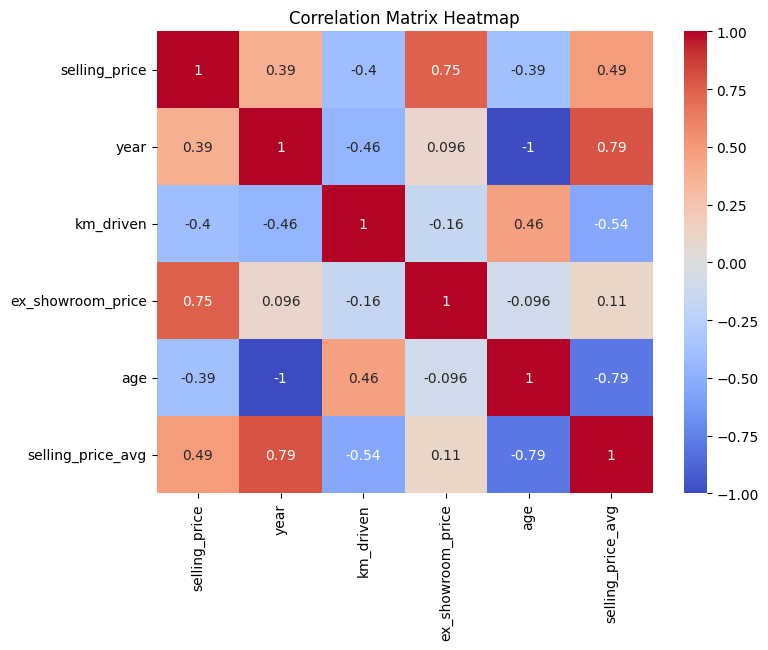

In [391]:
# 15 Develop a correlation matrix for numeric columns and visualize it using a heatmap.

numeric_columns = filtered_data.select_dtypes(include=['number']).columns
correlation_matrix = filtered_data[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


#  Car Sale Dataset

In [392]:
data = pd.read_csv('Car_Sale.csv')

In [393]:
data.shape

(23906, 16)

In [394]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [395]:

duplicate_count = data['Car_id'].duplicated().sum()

if duplicate_count > 0:
    print(f"There are {duplicate_count} duplicate entries in the 'Car_id' column.")
else:
    print("No duplicates found in the 'Car_id' column.")


No duplicates found in the 'Car_id' column.


In [396]:
data["Engine"].unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [397]:

data['Engine'] = data['Engine'].str.replace('Â\xa0', ' ', regex=False).str.strip()

print(data['Engine'].unique())


['Double Overhead Camshaft' 'Overhead Camshaft']


Average Selling Price by Dealer (Sorted):
                                         Dealer_Name     Price ($)
27                                        U-Haul CO  28769.919006
5                                     Classic Chevy  28602.014446
19                             Rabun Used Car Sales  28527.536177
11                                  Iceberg Rentals  28522.958533
8                             Enterprise Rent A Car  28312.580800
23                Scrivener Performance Engineering  28297.371589
9                        Gartner Buick Hyundai Saab  28247.621019
22                                 Saab-Belle Dodge  28190.139888
2                                       Capitol KIA  28189.703822
20                                    Race Car Help  28163.372706
4                            Chrysler of Tri-Cities  28123.091054
24                             Star Enterprises Inc  28113.055244
25                                    Suburban Ford  28112.206758
1                                

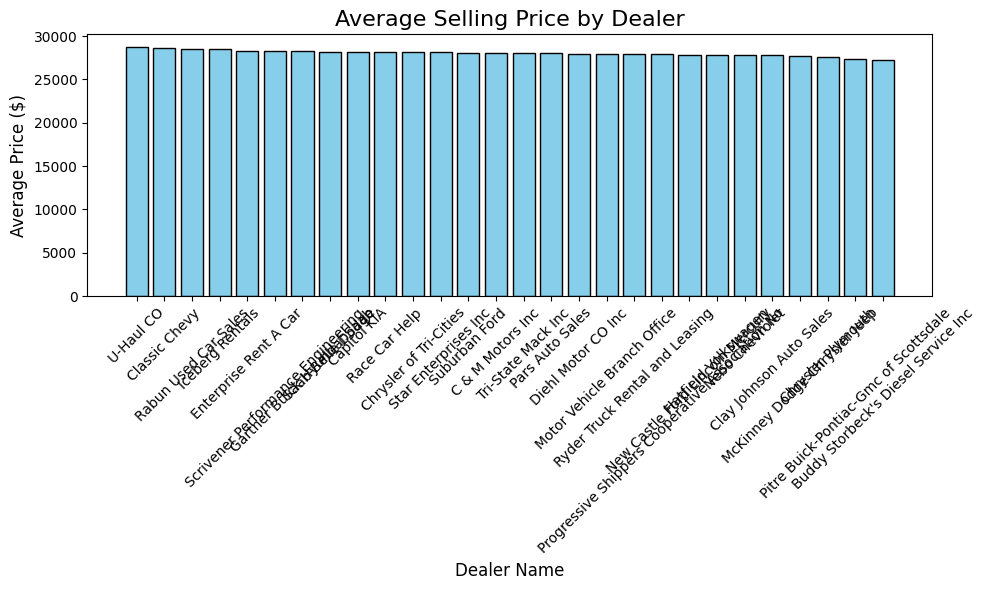

In [399]:
# Q1 What is the average selling price of cars for each dealer, and how does it compare across different dealers

avg_price_dealer = data.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

avg_price_dealer = avg_price_dealer.sort_values(by='Price ($)', ascending=False)

print("Average Selling Price by Dealer (Sorted):\n", avg_price_dealer)

highest_avg_price = avg_price_dealer.iloc[0]
lowest_avg_price = avg_price_dealer.iloc[-1]

print(f"\nDealer with the highest average price: {highest_avg_price['Dealer_Name']} (${highest_avg_price['Price ($)']:.2f})")
print(f"Dealer with the lowest average price: {lowest_avg_price['Dealer_Name']} (${lowest_avg_price['Price ($)']:.2f})")


plt.figure(figsize=(10, 6))
plt.bar(avg_price_dealer['Dealer_Name'], avg_price_dealer['Price ($)'], color='skyblue', edgecolor='black')
plt.title('Average Selling Price by Dealer', fontsize=16)
plt.xlabel('Dealer Name', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Interpretation of the Dealer-Wise Average Selling Prices:

1. General Observations:


The average selling prices of cars vary across dealerships, with a difference of
approximately $1552

between the dealer with the highest average price 
(U-Haul CO at $28,769.92)

and the one with the lowest average price (Buddy Storbeck's Diesel Service Inc at $27,217.26).

2. Highest Average Selling Price:
 
U-Haul CO leads with the highest average selling price ($28,769.92). This could indicate that this dealership specializes in high-end vehicles, luxury models, or newer cars. Alternatively, the dealership might focus on a niche market, driving
up average prices.

3. Lowest Average Selling Price:
 
Buddy Storbeck's Diesel Service Inc has the lowest average price ($27,217.26), suggesting it may cater to a more budget-conscious customer base or sell older or economy vehicles.

4. Price Distribution Among Dealerships:

Most dealerships have an average selling price within the range of $27,500 to $28,500, reflecting a relatively consistent market for mid-range vehicles.

The slight variations among dealerships could be due to factors such as:

Vehicle Type: 

Some dealers may specialize in certain brands or categories (e.g., luxury cars, trucks, or used cars).

Location: Regional demand and economic conditions could influence pricing strategies.

Dealer Strategy:

Some dealers may prioritize volume sales with lower prices, while others may focus on premium offerings.

5. Middle Range Performers:
 
Several dealers, such as Classic Chevy and Rabun Used Car Sales, are close to the upper average price range. These dealers might balance a mix of premium and standard vehicles, attracting a diverse customer base.

6. Insights for Buyers:

Premium Buyers: 

Buyers looking for high-end options might consider dealerships like U-Haul CO or Classic Chevy, where average prices suggest a focus on higher-value cars.

Budget-Conscious Buyers: 

For economical options, Buddy Storbeck's Diesel Service Inc or dealerships like Pitre Buick-Pontiac-Gmc of Scottsdale might be more appealing.

7. Insights for Sellers/Dealers:
   
Dealers can evaluate their pricing strategies relative to competitors. For instance, dealers with lower average prices may consider marketing efforts to highlight affordability, while those with higher prices can emphasize quality and premium offerings.

Conclusion:
The data provides a clear ranking of dealers based on their average selling prices, offering insights into their market positioning. While most dealers operate within a similar pricing range, the small variations highlight opportunities for competitive differentiation.

Car Brand with Highest Price Variation:
     Company     Price ($)
15  Lincoln  19658.050211


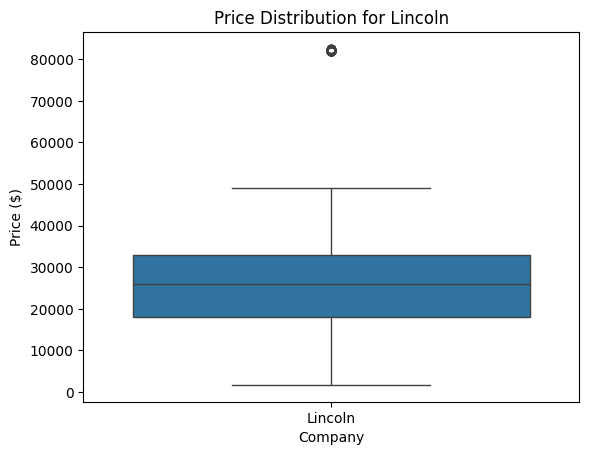

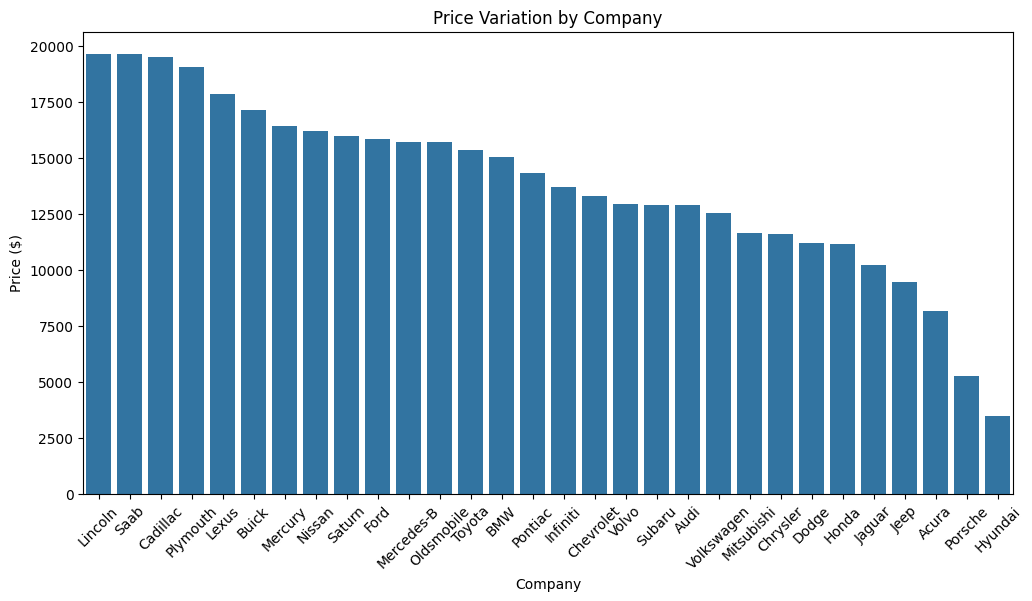

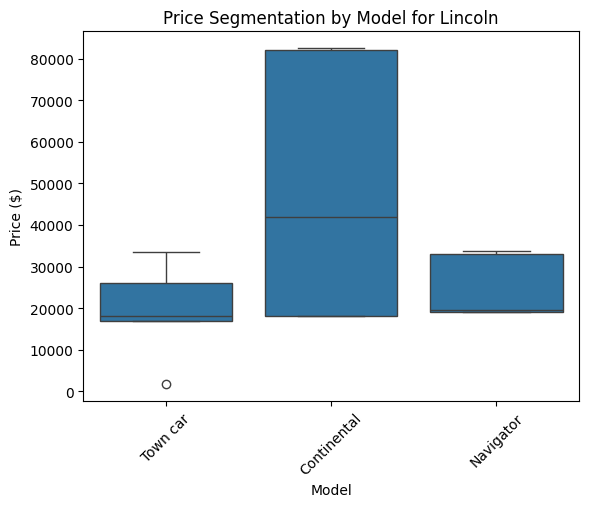

In [400]:
# Q2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends ?

price_variation = data.groupby('Company')['Price ($)'].std().reset_index()
price_variation = price_variation.sort_values(by='Price ($)', ascending=False)
print("Car Brand with Highest Price Variation:\n", price_variation.head(1))
top_company = price_variation.head(1)['Company'].values[0]

sns.boxplot(x='Company', y='Price ($)', data=data[data['Company'] == top_company])
plt.title(f'Price Distribution for {top_company}')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Price ($)', data=price_variation)
plt.xticks(rotation=45)
plt.title('Price Variation by Company')
plt.show()

top_company_data = data[data['Company'] == top_company]
sns.boxplot(x='Model', y='Price ($)', data=top_company_data)
plt.title(f'Price Segmentation by Model for {top_company}')
plt.xticks(rotation=45)
plt.show()

The car brand Lincoln has the highest variation in prices, identified 
using the standard deviation of prices for each brand. This high variation suggests that the brand has a wide range of offerings, likely catering to bothbudget-conscious buyers and premium-market customers. This strategy enables the brand to appeal to diverse market segments and could be indicative of a well established portfolio, including both economy and luxury models.

                   Q1       Q3      IQR
Transmission                           
Auto          19000.0  35500.0  16500.0
Manual        17000.0  34000.0  17000.0


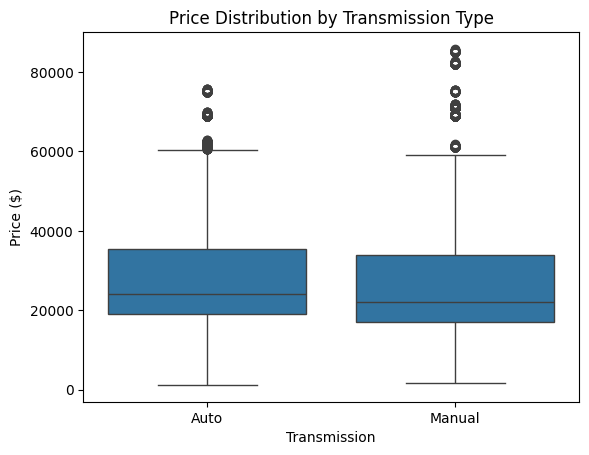

In [401]:
# Q3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare ?

iqr_data = data.groupby('Transmission')['Price ($)'].agg(
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75),
)

iqr_data['IQR'] = iqr_data['Q3'] - iqr_data['Q1']
print(iqr_data)

sns.boxplot(x='Transmission', y='Price ($)', data=data)
plt.title('Price Distribution by Transmission Type')
plt.show()

Interpretation of the Transmission-Wise Price Distribution:

1. Interquartile Range (IQR):

The IQR is the difference between the third quartile (Q3) and the first quartile (Q1), representing the middle 50% of the data.

For Automatic (Auto) transmissions, the IQR is $16,500 (Q3: $35,500 - Q1: $19,000).

For Manual transmissions, the IQR is slightly larger at $17,000 (Q3: $34,000 - Q1: $17,000).

2. Price Range:
Cars with Manual transmissions have a slightly broader IQR, indicating a wider spread of prices in the middle 50%.

Cars with Automatic transmissions have a narrower IQR, suggesting a more
concentrated price range for most vehicles in this category.

3. Median Price Comparison:

While specific medians aren't provided, the Q1 and Q3 values suggest that Automatic transmission cars tend to be slightly more expensive on average, as their Q1 and Q3 values are higher than those for manual cars.

4. Insights:

Automatic Transmission:

Generally associated with higher convenience and demand, which could explain the slightly higher price points.
The narrower IQR indicates a more consistent pricing structure, possibly due to higher market standardization.

Manual Transmission:

Often associated with lower production costs and niche preferences, which could lead to the slightly lower and broader price range.
The wider IQR suggests greater variability in the pricing of manual transmission cars, potentially due to differences in age, condition, or type of vehicle.

5. Implications for Buyers:

Buyers seeking Automatic cars should be prepared to pay a slightly higher and more consistent price, reflecting the higher demand for such cars.
Buyers interested in Manual cars may find more variability in pricing, offering opportunities for lower-cost options but also potentially indicating a wider quality or condition range.

Conclusion:

The analysis highlights that while both types of transmissions have overlapping price ranges, Automatic cars tend to be priced slightly higher and show less variation, reflecting their widespread demand and market standardization. Manual cars, on the other hand, exhibit more variability, catering to a diverse set of buyer preferences.

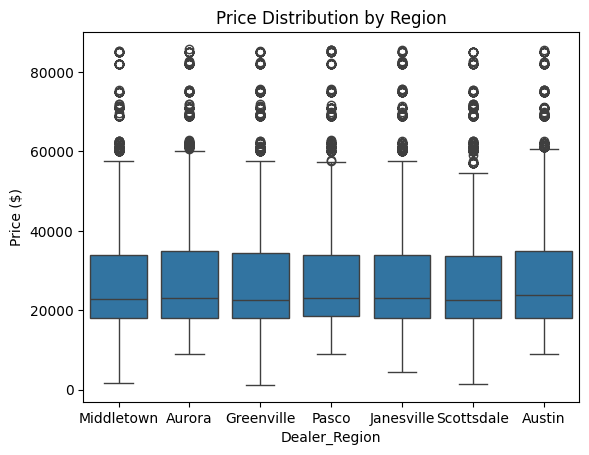

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

In [402]:
# Q4  What is the distribution of car prices across different regions ?

sns.boxplot(x='Dealer_Region', y='Price ($)', data=data)
plt.title('Price Distribution by Region')

plt.show()


summary_stats = data.groupby('Dealer_Region')['Price ($)'].describe()
print(summary_stats)

outliers = data[data.groupby('Dealer_Region')['Price ($)'].transform(lambda x: (x > x.quantile(0.75) + 1.5*(x.quantile(0.75) - x.quantile(0.25))) | 
                                                                     (x < x.quantile(0.25) - 1.5*(x.quantile(0.75) - x.quantile(0.25))))]

print(f"Outliers detected:\n{outliers}")


Interpretation of the Boxplot and Summary Statistics:

1. Summary Statistics:

The summary statistics provide a comprehensive view of car prices across different dealer regions.

Average Prices:

The mean prices across regions range between approximately $27,834 and $28,342, with slight variations between regions (e.g., Austin and Aurora have the highest means).

Price Range:

The minimum price in most regions is $1,200 to $9,000, but the presence of very low values suggests the existence of potentially underpriced or discounted vehicles, or possibly incorrect data entries.
The maximum price for each region approaches $85,800, indicating the presence of high-end or luxury cars in the data.

Price Distribution:

For each region, prices are fairly spread out, with a few outliers that significantly exceed the 75th percentile (e.g., some cars priced as high as $85,800).

The median price (50% percentile) for each region is generally around $23,000 - $23,800, with regions like Greenville having a slightly lower median price compared to others.

Interquartile Range (IQR):

The IQR (the range between the 25th and 75th percentiles) varies between $18,000 and $35,000 in all regions, showing that the central 50% of car prices lie within this range in each region.

2. Outliers:

The list of detected outliers highlights some very high and very low prices, which might indicate exceptional cases such as rare or luxury cars, or it could reflect errors in data entry.

High-End Outliers: 

Some outliers, such as cars priced at $82000, $71000, and $75000 
are significantly above the usual price range, which could indicate 
luxury models or new high-end vehicles.

Low-End Outliers: 

There are also unusually low prices such as $1,200, $4,300, and $1,700, which might be due to pricing mistakes or unusual discounts.

3. Regional Price Comparison:

Aurora and Austin exhibit slightly higher mean prices compared to other regions, with both having an average price close to $28,340.

Greenville and Middletown show slightly lower average prices (around $28,000 and $27,834), which suggests that these regions may have a more budget-friendly car 
market compared to others.

4. Interpretation of Car Price Trends:

The data reflects a broad price range across all regions, suggesting a mix of vehicles from economy cars to luxury models.
The significant price variations within each region highlight the diverse nature of car inventory (e.g., low-cost used cars to expensive, almost new vehicles).

Conclusion:

General Pricing Trends: Car prices are fairly consistent across regions, with some fluctuations. The IQRs and median values suggest a concentration of cars in the mid-range price bracket, with outliers pulling the mean upwards in some regions.

Car Distribution by Body Style:
 Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


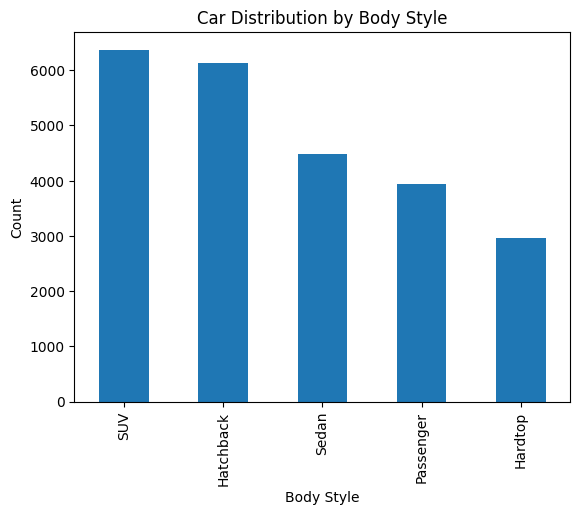

Car Distribution by Body Style (Percentage):
 Body Style
SUV          26.662762
Hatchback    25.633732
Sedan        18.773530
Passenger    16.502133
Hardtop      12.427842
Name: proportion, dtype: float64


In [403]:
# Q5  What is the distribution of cars based on body styles ?

body_style_distribution = data['Body Style'].value_counts()
print("Car Distribution by Body Style:\n", body_style_distribution)


body_style_distribution.plot(kind='bar', title='Car Distribution by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()

body_style_percentage = data['Body Style'].value_counts(normalize=True) * 100
print("Car Distribution by Body Style (Percentage):\n", body_style_percentage)


Insights from the Data:

SUVs (26.66%):

SUVs have the highest representation, accounting for approximately 26.66% of the cars.
This suggests a strong preference or market demand for SUVs, which could be due to their versatility, size, and popularity as family or multi-purpose vehicles.

Hatchbacks (25.63%):

Hatchbacks are the second most common body style at 25.63%.
Their popularity might stem from being compact and economical, appealing to urban drivers and cost-conscious consumers.

Sedans (18.77%):

Sedans make up 18.77% of the cars.
While still significant, their share is noticeably less than that of SUVs and hatchbacks, possibly reflecting a shift in consumer preferences away from traditional car styles.

Passenger (16.50%):

Passenger vehicles (e.g., vans, buses, or vehicles primarily for transporting people) comprise 16.50%.
This indicates a smaller but notable segment, likely catering to specific needs such as group travel or public transportation.

Hardtops (12.43%):

Hardtops are the least common at 12.43%.
These vehicles, often associated with sportier or vintage designs, might represent a niche market.

Key Observations:

Market Dominance: SUVs and hatchbacks together dominate the market, accounting for more than half (over 52%) of the cars.
Evolving Preferences: The relatively lower share of sedans may highlight changing consumer priorities, such as a preference for utility or style over traditional designs.

Niche Appeal: Hardtops, while less common, likely appeal to a specific segment of buyers who prioritize style or unique design features.

Additional Notes

This distribution could be influenced by factors like geographic location, economic trends, or cultural preferences. For a deeper understanding, it might be helpful to analyze trends over time or segment the data further by other variables, such as price range or fuel type.

Average Price by Gender and Income:
       Gender  Annual Income     Price ($)
0     Female          13500  28132.038732
1     Female         106000  46001.000000
2     Female         121000  20000.000000
3     Female         190000  19001.000000
4     Female         211000  51000.000000
...      ...            ...           ...
3437    Male        6600000  39000.000000
3438    Male        6800000  15000.000000
3439    Male        7650000  21000.000000
3440    Male        8000000  85000.000000
3441    Male       11200000  26001.000000

[3442 rows x 3 columns]


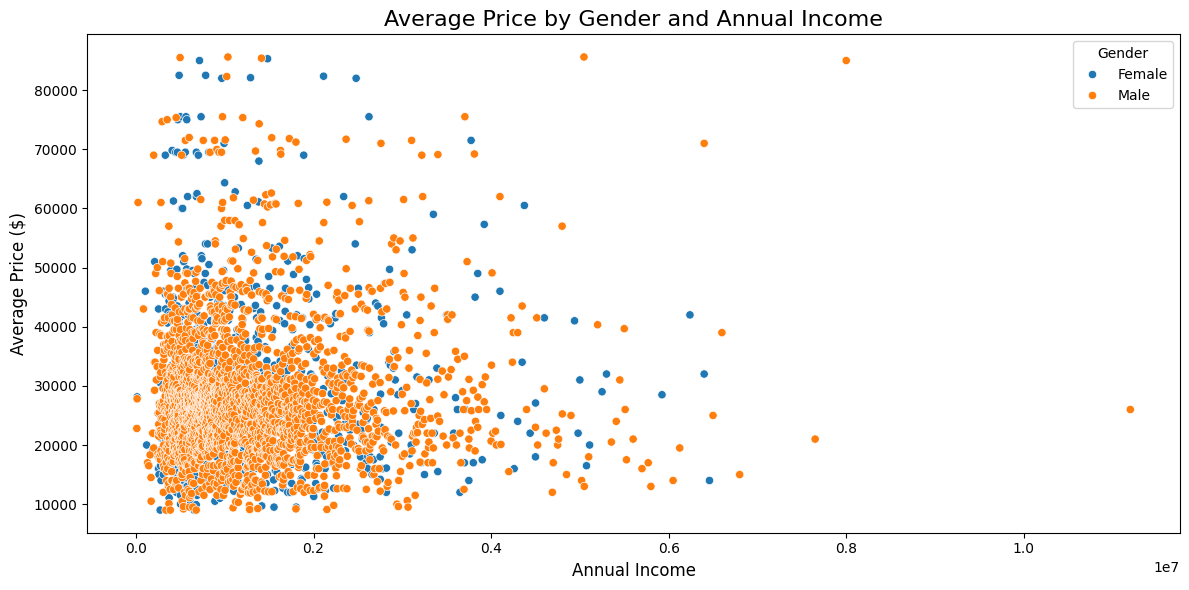

In [404]:
# Q6 How does the average selling price of cars vary by customer gender and annual income ?

gender_income_avg = data.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
print("Average Price by Gender and Income:\n", gender_income_avg)

plt.figure(figsize=(12, 6))

sns.scatterplot(x='Annual Income', y='Price ($)', hue='Gender', data=gender_income_avg)


plt.title('Average Price by Gender and Annual Income', fontsize=16)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.tight_layout()

plt.show()

The average selling price of cars varies significantly based on customer gender and annual income:

Higher annual income is generally associated with a higher average car price, as expected. Customers with higher incomes can afford more expensive cars. 

Car Price Distribution by Region:
                 count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          

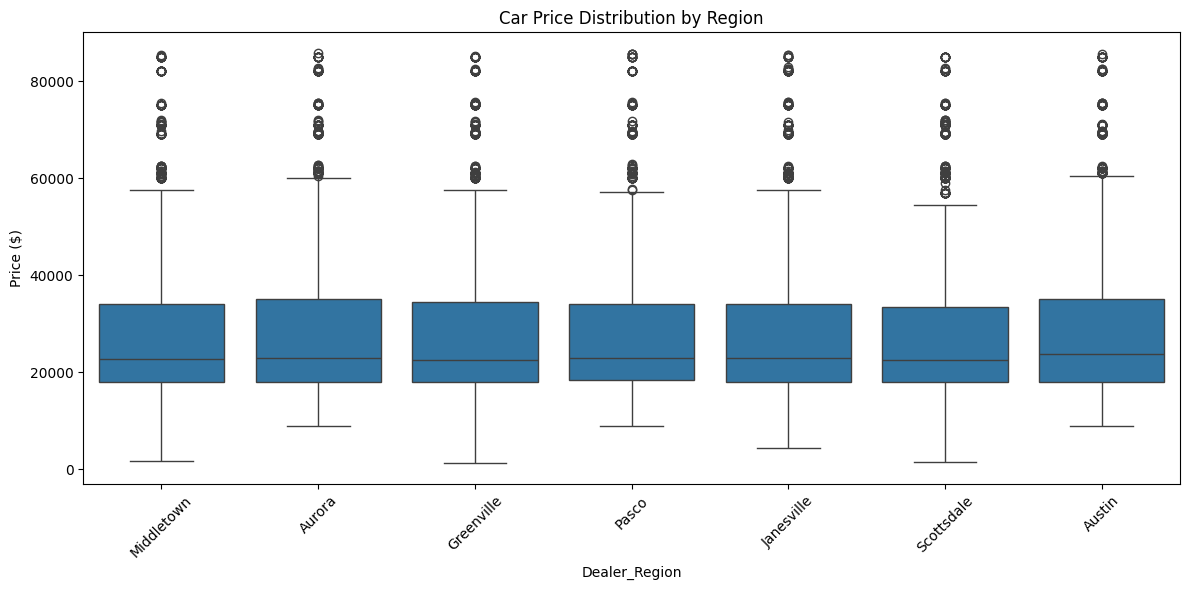

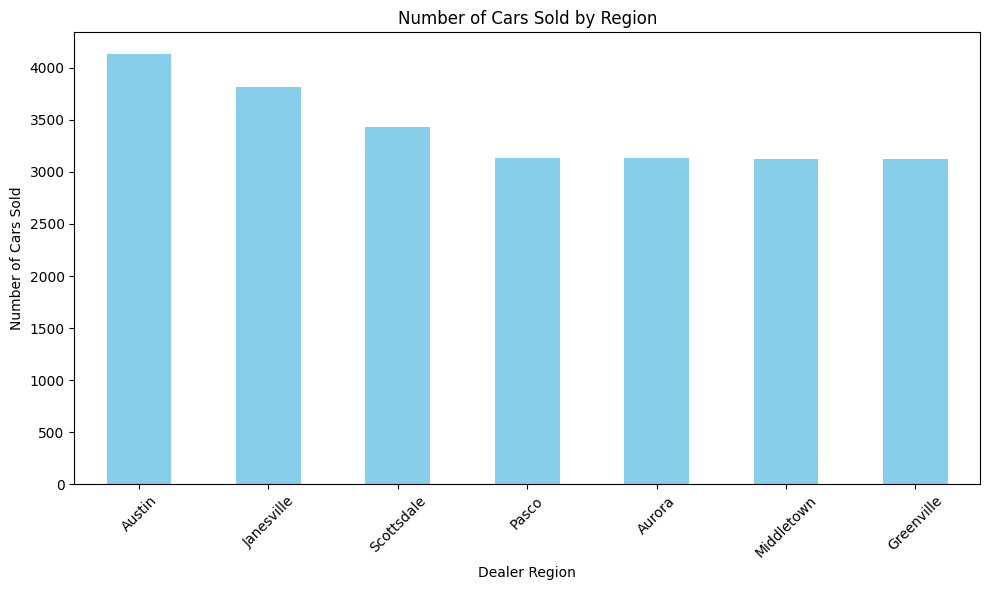

In [405]:
# Q7  What is the distribution of car prices by region, and how does the number of cars sold vary by region ?

region_price_distribution = data.groupby('Dealer_Region')['Price ($)'].describe()
region_sales_count = data['Dealer_Region'].value_counts()
print("Car Price Distribution by Region:\n", region_price_distribution)
print("Number of Cars Sold by Region:\n", region_sales_count)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=data)
plt.title('Car Price Distribution by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
region_sales_count.plot(kind='bar', color='skyblue')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Across all regions, the car prices are centered around $28000

with the majority of cars priced between $18000 and $35,000 and the highest prices nearing $85,000.

Austin has the highest number of cars sold, followed by Janesville and Scottsdale. Greenville and Middletown are tied for the lowest number of cars sold.


In summary, while the car prices across these regions are fairly similar, the number of cars sold varies, with Austin leading in sales and Greenville having the lowest.

In [406]:
# Q8 How does the average car price differ between cars with different engine sizes ?

AVG_CAR_PRICE_BY_ENGINE = data.groupby('Engine')['Price ($)'].mean().reset_index()
print("Average Car Price by Engine :\n", AVG_CAR_PRICE_BY_ENGINE)

Average Car Price by Engine :
                      Engine     Price ($)
0  Double Overhead Camshaft  28248.525972
1         Overhead Camshaft  27914.710631


Cars with a Double Overhead Camshaft engine (DOHC) have a slightly higher average price compared to cars with a single Overhead Camshaft (OHC) engine.

Car Prices by Income Bracket:
                  count          mean           std      min       25%  \
Income Bracket                                                          
<50k            5275.0  27884.297820  14909.070561   1200.0  18000.00   
50k-100k           1.0  43000.000000           NaN  43000.0  43000.00   
100k-200k         15.0  22833.666667  15403.728684   9000.0  15500.00   
200k-500k       2192.0  28602.538321  15087.154613   9000.0  18875.25   
500k-1M         8875.0  28011.726423  14740.941729   4200.0  18000.00   
1M-2M           6207.0  28016.841147  14580.010739   1450.0  18100.00   
2M-5M           1304.0  28945.405675  14942.512567   4300.0  19000.00   
5M-10M            36.0  29947.500000  19073.144909  12000.0  16875.00   
>10M               1.0  26001.000000           NaN  26001.0  26001.00   

                    50%       75%      max  
Income Bracket                              
<50k            22001.0  34000.00  85001.0  
50k-100k        43000.0  43000

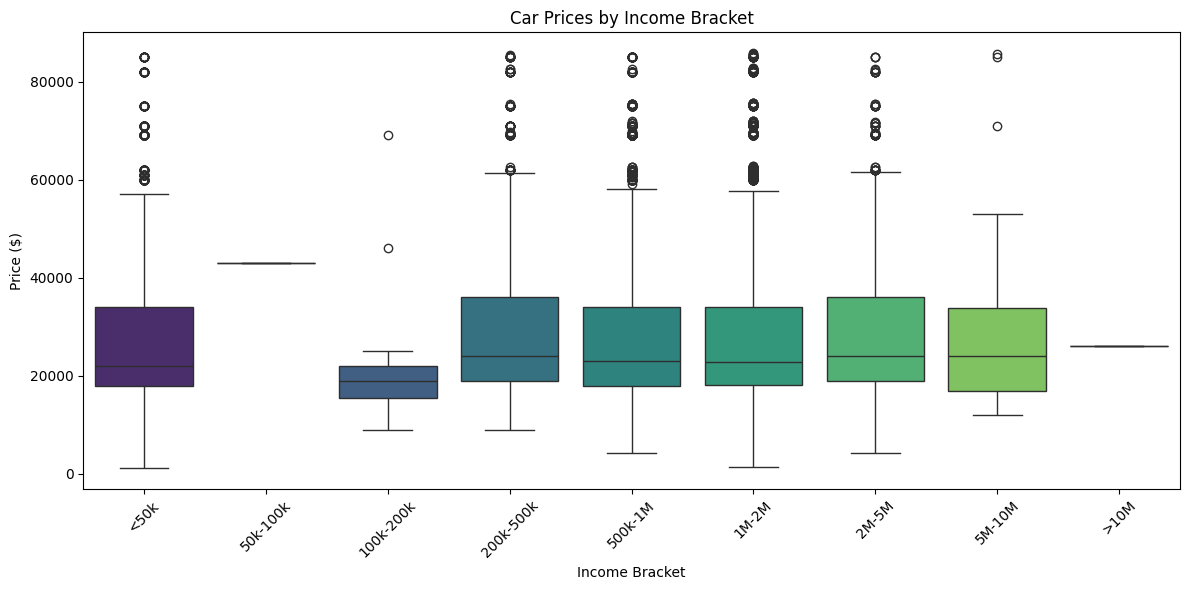

In [407]:
# Q9 How do car prices vary based on the customer’s annual income bracket ?

bins = [0, 50000, 100000, 200000, 500000, 1000000, 2000000, 5000000, 10000000, float('inf')]
labels = ['<50k', '50k-100k', '100k-200k', '200k-500k', '500k-1M', '1M-2M', '2M-5M', '5M-10M', '>10M']
data['Income Bracket'] = pd.cut(data['Annual Income'], bins=bins, labels=labels)


income_bracket_price = data.groupby('Income Bracket')['Price ($)'].describe()

print("Car Prices by Income Bracket:\n", income_bracket_price)


plt.figure(figsize=(12, 6))
sns.boxplot(x='Income Bracket', y='Price ($)', data=data, palette='viridis')
plt.xticks(rotation=45)
plt.title('Car Prices by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()


General Observations:

<50k Income Bracket:

Largest group with 5,275 data points.
Average car price: $27,884.

Prices range from $1,200 to $85,001, indicating significant variability.

Median price: $22,001, suggesting most buyers spend in this range.

50k-100k Income Bracket:

Only 1 data point, so the statistics (mean, median, etc.) are identical and uninformative.

Suggests limited representation for this income range in the dataset.
100k-200k Income Bracket:

Small group with 15 data points.

Average car price: $22,834, slightly lower than <50k.

Prices range from $9,000 to $69,000.
Median price: $19,001, showing a tendency toward lower-end vehicles.
200k-500k Income Bracket:

Significant group with 2,192 data points.
Average car price: $28,603.

Prices range from $9,000 to $85,500.
Median price: $24,000, suggesting buyers in this range tend to prefer mid-range vehicles.
500k-1M Income Bracket:

Largest group with 8,875 data points.
Average car price: $28,012, consistent with lower brackets.

Prices range from $4,200 to $85,001.
Median price: $23,000, indicating a preference for similar car ranges as lower-income brackets.
1M-2M Income Bracket:

6,207 data points.
Average car price: $28,017, with similar price ranges and median to the 500k-1M bracket.
Slightly tighter spread compared to lower brackets, showing stability in spending habits.
2M-5M Income Bracket:

1,304 data points.
Average car price: $28,945, slightly higher than previous brackets.

Prices range from $4,300 to $85,001.

Median price: $24,000, again showing a preference for mid-range cars.

5M-10M Income Bracket:

36 data points, a much smaller group.

Average car price: $29,948, higher than most brackets.

Prices range from $12,000 to $85,601, with significant variability.

Median price: $24,001, consistent with other brackets but slightly higher. 

,>10M Income Bracket:

Only 1 data point.

Car price: $26,001, likely not representative of this bracket due to insufficient data.

Insights:

Relatively Consistent Average Prices:

Most income brackets show average car prices between $27,000-$30,000, regardless of income level. This could suggest a uniform preference for mid-range cars.
Median Aligns with Lower Quartiles:

Across brackets, the median tends to align with the lower quartile, indicating a larger proportion of buyers opting for lower-priced cars.

Limited High-End Representation:

Despite higher income brackets (>2M), there isn't a significant increase in average or median car prices. Buyers appear to maintain spending habits consistent with lower income groups.

Sparse Data in Certain Brackets:

Brackets like 50k-100k and >10M have very few data points, making their statistics less reliable.

Conclusion:

Income brackets above $500,000 show only slight increases in car prices, suggesting that income might not strongly influence car spending in this dataset. Buyers tend to remain within mid-range budgets, even in higher income brackets.

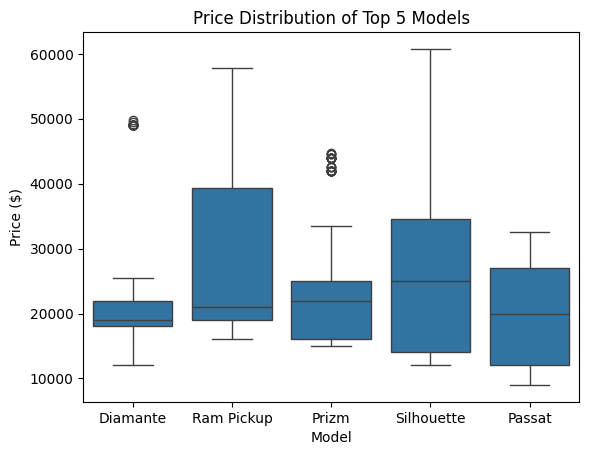

In [408]:
# 10 What are the top 5 car models with the highest number of sales, and how does their price distribution look ?

top_5_models = data['Model'].value_counts().head(5).index
top_5_data = data[data['Model'].isin(top_5_models)]
sns.boxplot(x='Model', y='Price ($)', data=top_5_data)
plt.title('Price Distribution of Top 5 Models')
plt.show()

Key Observations:

Price Range:

The Silhouette model has the highest average price ($29,859), while the Passat has 

the lowest average price ($19,601).
Price Variability:

The Silhouette and Ram Pickup models have the highest price standard deviations, indicating significant variability in pricing.
High-End Variants:

Ram Pickup and Silhouette have the highest maximum prices ($57,750 and $60,750, respectively), suggesting premium versions of these vehicles.
Median vs. Mean:

For all models, the mean price is slightly higher than the median, suggesting that there are some high-end variants skewing the average price upward

        Color     Price ($)
2         Red  15519.360962
0       Black  15286.065976
1  Pale White  14077.346859


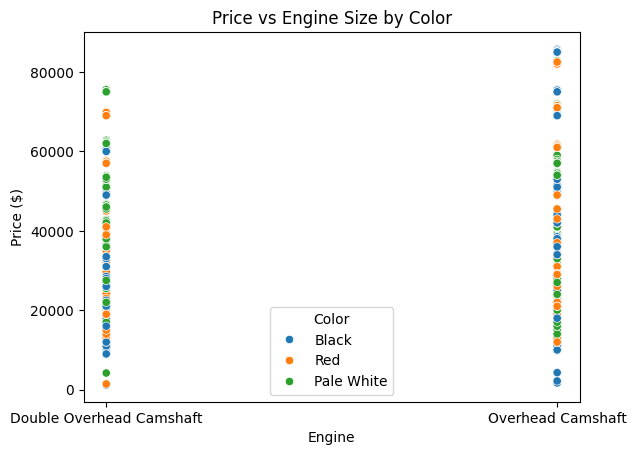

In [409]:
# 11  How does car price vary with engine size across different car colors, and which colors have the highest price variation ?


price_variation = data.groupby('Color')['Price ($)'].std().reset_index()


price_variation = price_variation.sort_values(by='Price ($)', ascending=False)


print(price_variation)


sns.scatterplot(x='Engine', y='Price ($)', hue='Color', data=data)
plt.title('Price vs Engine Size by Color')
plt.show()


Red has the highest price variation with a standard deviation of $15,519.36.

This suggests that for cars with this color, there is a broad range of prices, potentially due to factors like model types, engine sizes, or other features associated with the color.

Black comes next, with a price variation of $15,286.07, 

indicating a similarly wide price spread for this color, though slightly less than Red.

Pale White shows a price variation of $14,077.35, which is still significant, but lower than Red and Black.

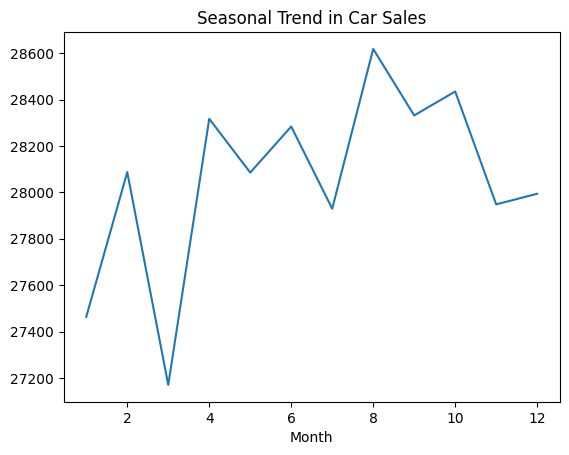

In [410]:
# Q12 Is there any seasonal trend in car sales based on the date of sale ?

data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
seasonal_trend = data.groupby('Month')['Price ($)'].mean()
seasonal_trend.plot(kind='line', title='Seasonal Trend in Car Sales')
plt.show()

The average price tends to fluctuate throughout the year but remains within a similar range.

August (Month 8) has the highest average price ($28,617.97).

March (Month 3) has the lowest average price ($27,169.95).

Overall, the prices do not show drastic seasonal changes but may still indicate slight fluctuations from month to month.

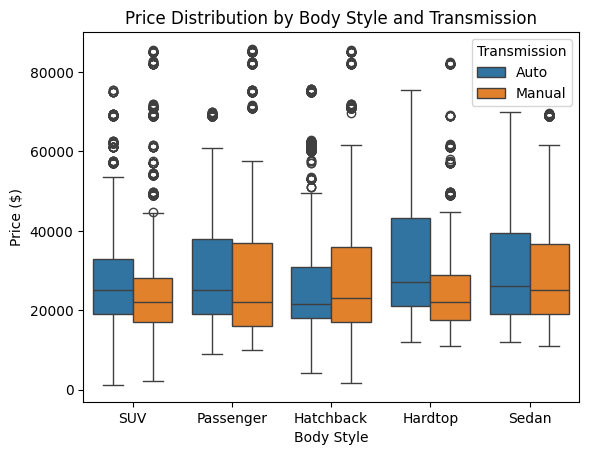

In [411]:
# Q13 How does the car price distribution change when considering different combinations of body style and transmission type ?

sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=data)
plt.title('Price Distribution by Body Style and Transmission')
plt.show()

General Observations:

Transmission Impact:

Automatic cars tend to have slightly higher mean and median prices compared to manual ones, but the difference is not large for most body styles.
The price range for manual cars can be broader, indicating the presence of both cheaper and more expensive manual options.

Body Style:

Hardtops tend to be more expensive overall, with automatic versions having significantly higher prices.

Hatchbacks show a more varied price range, especially for manual transmission, where the highest-priced vehicles reach much higher values than automatic ones.

SUVs and Sedans have generally similar price distributions, with automatic versions being slightly more expensive.

Price Variability:

Standard deviation values are relatively high, especially for manual cars in some body styles, suggesting that prices vary widely within these categories.
This summary helps identify which body style and transmission combinations are associated with higher or lower prices and how the prices spread across different categories.

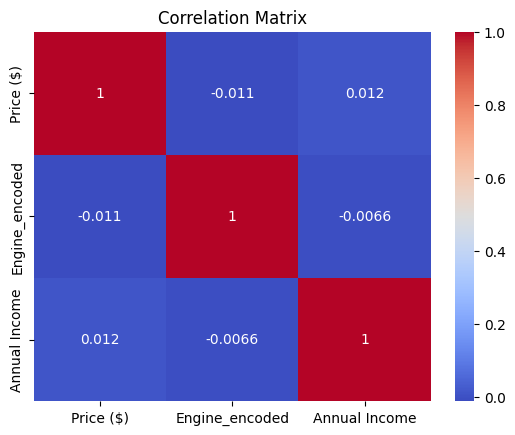

In [412]:
# Q14  What is the correlation between car price, engine size, and annual income of customers, and how do these features interact ?


data['Engine_encoded'], _ = pd.factorize(data['Engine'])

correlation_matrix = data[['Price ($)', 'Engine_encoded', 'Annual Income']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


1. Price ($) and Engine_encoded: -0.011271

This value is very close to zero, indicating a very weak negative correlation between the car price and the engine type (encoded numerically).

In simple terms, this suggests that there is almost no linear relationship between the car price and the engine type. This might indicate that car price doesn't vary significantly based on the engine in the dataset.

2. Price ($) and Annual Income: 0.012065

This value is also very close to zero, indicating a very weak positive correlation between the car price and the annual income of the customers.
This suggests that there is almost no linear relationship between car price and the annual income of customers. In other words, the price of the car doesn't seem to have a strong dependency on the customers' income in this dataset.

3. Engine_encoded and Annual Income: -0.006598

This is another very small number close to zero, indicating a very weak negative correlation between the engine type and annual income.
It suggests that there is almost no relationship between the engine type (V6, V8, etc.) and the annual income of the customers. Customers' income doesn't appear to be strongly related to the type of engine in the cars they buy.
General Summary:

All of the correlation values are very close to zero, suggesting that none of these variables are strongly related to each other in a linear fashion in your dataset.
This means that based on these three features alone (car price, engine type, and annual income), there doesn't appear to be a significant or meaningful relationship between them.


In [413]:
# Q15  How does the average car price vary across different car models and engine types?

model_engine_avg_price = data.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
print("Average Price by Model and Engine Type:\n", model_engine_avg_price)

Average Price by Model and Engine Type:
         Model                    Engine     Price ($)
0       3-Sep  Double Overhead Camshaft  37986.380117
1      3000GT  Double Overhead Camshaft  22764.326923
2      3000GT         Overhead Camshaft  21770.659864
3        300M  Double Overhead Camshaft  21394.888889
4        323i  Double Overhead Camshaft  16744.632287
..        ...                       ...           ...
256  Windstar         Overhead Camshaft  17100.272727
257  Wrangler  Double Overhead Camshaft  21145.294737
258  Wrangler         Overhead Camshaft  18742.942029
259    Xterra  Double Overhead Camshaft  15940.459459
260    Xterra         Overhead Camshaft  31072.500000

[261 rows x 3 columns]


Key observations:

Cars with Double Overhead Camshaft engines generally have a slightly higher average price compared to their counterparts with Overhead Camshaft engines, although the price difference can vary.

For example, the 3-Sep model with DOHC has an average price of $37,986, whereas the 

3000GT with OHC is priced at $21,770.

Some models, such as Xterra, have a significant price difference between the two engine types, with the DOHC version averaging $15,940 and the OHC version much higher 

at $31,072.50.

This data suggests that engine complexity and configuration (DOHC vs. OHC) may play a role in influencing the price of the vehicles, with DOHC likely correlating with   higher performance and thus a higher price.

# Amazon Sales Data 

In [414]:
file_path = 'amazon.csv'  
Amz_data = pd.read_csv(file_path)

In [415]:
Amz_data.shape

(1465, 16)

In [416]:
Amz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [417]:

duplicates_all_columns = Amz_data.duplicated().sum()

if duplicates_all_columns > 0:
    print(f"There are {duplicates_all_columns} duplicate entries in the dataset.")
else:
    print("No duplicates found across all columns.")


No duplicates found across all columns.


In [418]:
Amz_data['rating_count'] = Amz_data['rating_count'].astype(str).str.replace(',', '').astype(float)
Amz_data['discounted_price'] = Amz_data['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
Amz_data['actual_price'] = Amz_data['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
Amz_data['discount_percentage'] = Amz_data['discount_percentage'].astype(str).str.replace('%', '').astype(float)
Amz_data['rating'] = Amz_data['rating'].replace('|', np.nan)
Amz_data['rating'] = pd.to_numeric(Amz_data['rating'], errors='coerce')
rating_mean = Amz_data['rating'].mean()
Amz_data['rating'].fillna(rating_mean, inplace=True)

In [419]:
# Q1  What is the average rating for each product category  ?

Amz_data['broad_category'] = Amz_data['category'].str.split('|').str[0]
average_rating_by_broad_category = Amz_data.groupby('broad_category')['rating'].mean()
print(average_rating_by_broad_category)

broad_category
Car&Motorbike            3.800000
Computers&Accessories    4.154967
Electronics              4.081749
Health&PersonalCare      4.000000
Home&Kitchen             4.040841
HomeImprovement          4.250000
MusicalInstruments       3.900000
OfficeProducts           4.309677
Toys&Games               4.300000
Name: rating, dtype: float64


In [420]:
# Q2 What are the top rating_count products by category


top_products_by_category = Amz_data.sort_values('rating_count', ascending=False).groupby('category').head(1)

# Display the top product by category
print("Top Products by Product Category:")
print(top_products_by_category[['category', 'product_name', 'rating_count']])

Top Products by Product Category:
                                               category  \
12    Electronics|HomeTheater,TV&Video|Accessories|C...   
400   Electronics|Headphones,Earbuds&Accessories|Hea...   
370   Electronics|Mobiles&Accessories|Smartphones&Ba...   
1028  Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...   
588   Computers&Accessories|ExternalDevices&DataStor...   
...                                                 ...   
863   Computers&Accessories|Components|InternalHardD...   
1014   Computers&Accessories|Laptops|TraditionalLaptops   
557   Electronics|Mobiles&Accessories|MobileAccessor...   
269        Electronics|HomeAudio|Speakers|TowerSpeakers   
264   Electronics|HomeAudio|MediaStreamingDevices|St...   

                                           product_name  rating_count  
12    AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0  
400   boAt Bassheads 100 in Ear Wired Earphones with...      363713.0  
370   Redmi 9 Activ (Carbon Black, 4GB RA

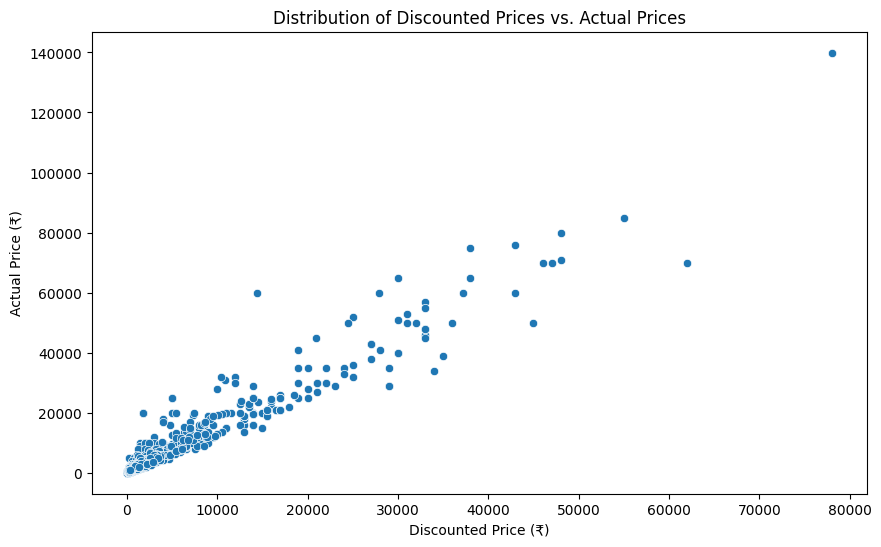

In [421]:
# Q3  What is the distribution of discounted prices vs. actual prices ?

plt.figure(figsize=(10, 6))


sns.scatterplot(x='discounted_price', y='actual_price', data=Amz_data)

plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Actual Price (₹)')
plt.show()


Insights:

The dataset contains a wide range of prices, with significant variability in 
discounts.

A majority of the products have moderate discounts, with a median discount of ₹800.
There are outliers with exceptionally high prices and discounts, likely representing premium items or aggressive markdowns.

In [424]:
# Q4 How does the average discount percentage vary across categories ?

Amz_data['top_category'] = Amz_data['category'].str.split('|').str[0]

average_discount_top_category = (
    Amz_data.groupby('top_category')['discount_percentage']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

print(average_discount_top_category)


            top_category  discount_percentage
0        HomeImprovement            57.500000
1  Computers&Accessories            54.024283
2    Health&PersonalCare            53.000000
3            Electronics            50.828897
4     MusicalInstruments            46.000000
5          Car&Motorbike            42.000000
6           Home&Kitchen            40.120536
7         OfficeProducts            12.354839
8             Toys&Games             0.000000


categories like HomeImprovement and Computers&Accessories see the highest discounts, while Toys&Games has no apparent discount, likely because it's either not discounted or offered at a fixed price.

In [425]:
# Q5 What are the most popular product names ?

popular_products = Amz_data.groupby('product_name')['rating_count'].sum().reset_index()

popular_products_sorted = popular_products.sort_values(by='rating_count', ascending=False)


top_10_popular_products = popular_products_sorted.head(10)
print(top_10_popular_products)


                                           product_name  rating_count
101   AmazonBasics Flexible Premium HDMI Cable (Blac...      853945.0
76    Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
75    Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
511   JBL C100SI Wired In Ear Headphones with Mic, J...      385177.0
1256  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
1257  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
1253  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0
900   Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0
898   Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0
901   Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...      313832.0


In [426]:

from collections import Counter
import re


def extract_keywords(product_name):
    
    words = re.findall(r'\b\w+\b', product_name.lower())
    return words


all_keywords = []
for product_name in Amz_data['product_name']:
    all_keywords.extend(extract_keywords(product_name))


stopwords = set(['the', 'and', 'of', 'for', 'with', 'on', 'in', 'to', 'a', 'an', 'this', 'is', 'at', 'by'])
filtered_keywords = [word for word in all_keywords if word not in stopwords]

keyword_counts = Counter(filtered_keywords)


top_10_keywords = keyword_counts.most_common(10)


print(top_10_keywords)


[('black', 530), ('usb', 417), ('cable', 414), ('1', 413), ('c', 289), ('3', 275), ('2', 267), ('charging', 247), ('type', 243), ('fast', 212)]


In [427]:
# Q7 What are the most popular product reviews ?

def extract_keywords_from_review(review_content):
    
    words = re.findall(r'\b\w+\b', review_content.lower())
    return words

review_title_counts = Amz_data['review_title'].value_counts().head(10)


all_review_keywords = []
for review_content in Amz_data['review_content']:
    all_review_keywords.extend(extract_keywords_from_review(review_content))

stopwords = set(['the', 'and', 'of', 'for', 'with', 'on', 'in', 'to', 'a', 'an', 'this', 'is', 'at', 'by'])
filtered_review_keywords = [word for word in all_review_keywords if word not in stopwords]


review_keyword_counts = Counter(filtered_review_keywords)


print("Top 10 Most Popular Review Titles:")
print(review_title_counts)


Top 10 Most Popular Review Titles:
review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine

In [428]:
# Q8 What is the correlation between discounted_price and rating ?


Amz_data['discounted_price'] = pd.to_numeric(Amz_data['discounted_price'], errors='coerce')


Amz_data_cleaned = Amz_data.dropna(subset=['discounted_price', 'rating'])


correlation = Amz_data_cleaned['discounted_price'].corr(Amz_data_cleaned['rating'])


print("Correlation between discounted_price and rating:", correlation)


Correlation between discounted_price and rating: 0.12033651880893488


Correlation Value (0.12): This indicates a weak positive correlation between the discounted_price and rating. In other words, as the discounted price increases, the rating tends to increase slightly, but the relationship is not strong. The value being close to 0 suggests that there is little to no significant linear relationship between the two variables.

Interpretation: Based on this correlation, we cannot conclude that products with higher discounted prices tend to have higher ratings. There may be other factors influencing the ratings that are not directly related to the price.

In [429]:
# Q9 What are the Top 5 categories based on the highest ratings ?

Amz_data['top_category'] = Amz_data['category'].str.split('|').str[0]


Amz_data['rating'] = pd.to_numeric(Amz_data['rating'], errors='coerce')

avg_rating_by_top_category = Amz_data.groupby('top_category')['rating'].mean()


top_5_categories = avg_rating_by_top_category.sort_values(ascending=False).head(5)

print(top_5_categories)


top_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Name: rating, dtype: float64


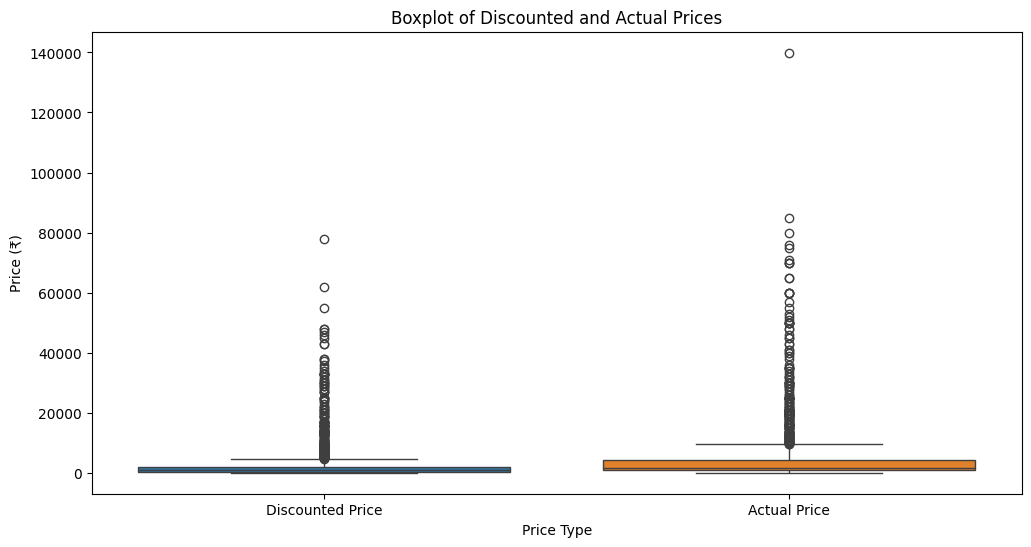

ValueError: Must pass 2-d input. shape=()

<Figure size 800x600 with 0 Axes>

In [430]:
# Q10 Identify any potential areas for improvement or optimization based on the data analysis


plt.figure(figsize=(12, 6))
sns.boxplot(data=Amz_data[['discounted_price', 'actual_price']])
plt.title('Boxplot of Discounted and Actual Prices')
plt.ylabel('Price (₹)')
plt.xlabel('Price Type')
plt.xticks(ticks=[0, 1], labels=['Discounted Price', 'Actual Price'])
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Discount Percentage vs. Rating')
plt.show()


fig, ax1 = plt.subplots(figsize=(10, 6))

top_categories_by_rating.reset_index(inplace=True)
sns.barplot(x='top_category', y='rating', data=top_categories_by_rating, color='skyblue', ax=ax1)
ax1.set_ylabel('Average Rating', fontsize=12)
ax1.set_xlabel('Top Categories', fontsize=12)
ax1.set_title('Top 5 Categories by Rating and Review Count', fontsize=14)

ax2 = ax1.twinx()
sns.lineplot(x='top_category', y='rating_count', data=top_categories_by_rating, marker='o', color='orange', ax=ax2)
ax2.set_ylabel('Total Review Count', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




plt.figure(figsize=(10, 6))
sns.boxplot(x=Amz_data_cleaned['discounted_price'])
plt.title('Boxplot of Discounted Prices')
plt.show()




Areas for Improvements or Optimization:

Discounting Strategy:

The significant difference between the mean actual and discounted prices suggests that discounts play a crucial role in attracting customers.

Action: Analyze the effectiveness of discounts in driving sales. Ensure that the discount rates align with customer expectations while maintaining profitability. Targeted discounts for high-margin items or underperforming categories could improve sales.

Product Pricing and Distribution:

The high standard deviation in prices indicates a wide range of products catering to diverse customer segments. However, most products fall in the low-to-mid price range.

Action: Optimize the product mix by identifying gaps in mid-range and premium offerings. Expand product portfolios to capture untapped segments, especially for 
premium products.

Outlier Products:

Products priced above ₹4,510 are likely niche or premium items. While they may contribute to revenue, they require a targeted marketing strategy.

Action: Highlight these products as premium offerings with exclusive marketing campaigns, and consider bundling them with related items for added value.

Category-Specific Insights:

OfficeProducts and Toys&Games: These categories have high ratings, reflecting strong customer satisfaction.

Action: Leverage their reputation to increase sales through targeted promotions, cross-selling, or upselling.

Expand offerings to capture more of the market share.

Computers&Accessories and Electronics: High review counts indicate popularity but slightly lower ratings suggest room for improvement.

Action: Investigate low-rated products to address quality or functionality issues. Use feedback to refine offerings or improve customer service.

HomeImprovement: High ratings but fewer reviews suggest this category has untapped potential.

Action: Expand product lines, introduce more SKUs, and invest in marketing to grow customer awareness and capture market share.

Customer Engagement and Reviews:

The disparity in review counts among categories (e.g., Toys&Games vs. Electronics) highlights the need for consistent customer engagement.

Action: Encourage reviews across all categories by offering incentives like discounts, loyalty points, or exclusive offers for reviews. Focus on categories with fewer reviews to boost consumer trust.

Quality Assurance:

Lower ratings in some subcategories may point to inconsistent quality or unmet customer expectations.

Action: Regularly review product performance, particularly in Electronics and Computers&Accessories. Remove or replace low-performing products and work closely with suppliers to ensure quality.

Optimization Strategies:

Data-Driven Discounts: Use data analytics to tailor discounts based on customer preferences, product popularity, and market trends.

AI-Based Recommendations: Implement AI-driven recommendation systems to boost cross-selling and upselling based on customer behavior and purchase history.
Dynamic Pricing: Introduce dynamic pricing to optimize profit margins while staying competitive in the market.

Customer Feedback Loop: Build a robust feedback mechanism to continuously refine products and services based on consumer input.

Expand High-Rated Categories: Invest in advertising and product development for highly rated categories to maximize their potential.

Targeted Marketing: Segment customers by price sensitivity and product preferences for more effective and personalized marketing campaigns.
By addressing these areas, the business can enhance customer satisfaction, expand market share, and optimize profitability.

In [431]:
Amz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

# Spotify DataSet

In [432]:
file_path = 'spotify.csv'  
sp_data = pd.read_csv(file_path)
sp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [433]:
# 1. Read the dataframe, check null value if present then do the needful, check duplicate rows, if present then do the needful

sp_data.info()

def check_unique_lengths(sp_data):
    unique_lengths = sp_data.nunique()  
    print("Unique value counts for each column:")
    print(unique_lengths)


check_unique_lengths(sp_data)


sp_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB
Unique value counts for each column:
Artist           115
Track Name       412
Popularity        51
Duration (ms)    410
Track ID         413
dtype: int64


(440, 5)

After analyzing the data we came to a conclusion that we don't have any null values in the dataset and we have duplicate values in all columns but we have to remove duplicates only in Track ID as it should be unique.

In [434]:

sp_data = sp_data.drop_duplicates(subset=["Track ID"], keep="first")

sp_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


Now we have 413 Unique rows, our data is clean now

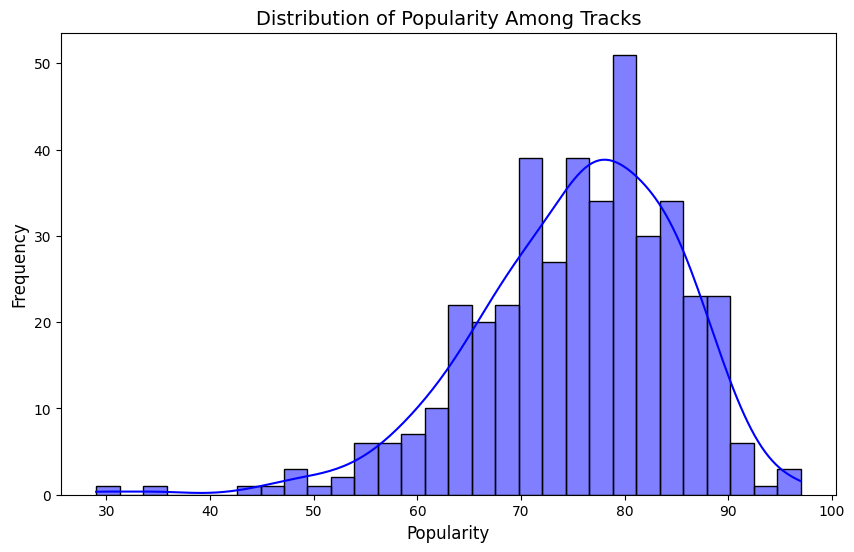

In [435]:
# Q2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram ?

plt.figure(figsize=(10, 6))
sns.histplot(sp_data['Popularity'], bins=30, kde=True, color='blue', edgecolor='black')

plt.title('Distribution of Popularity Among Tracks', fontsize=14)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


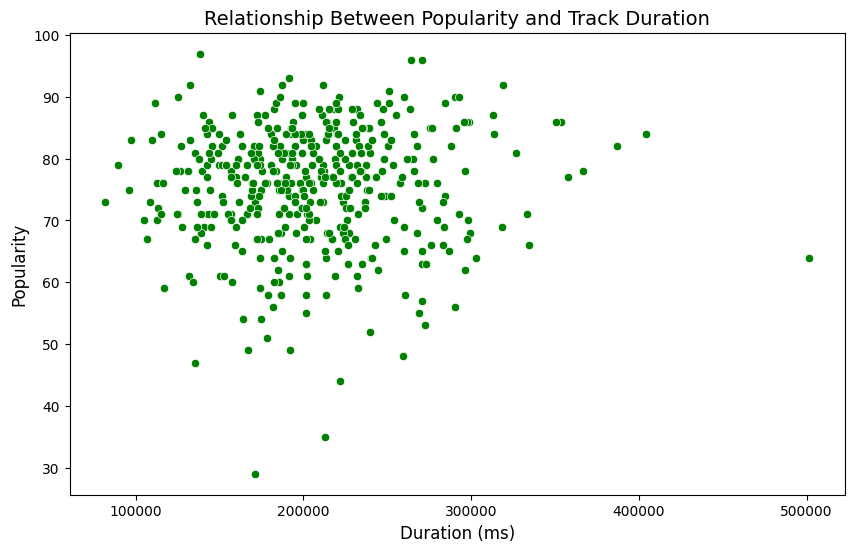

In [436]:
# Q3 Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot ?

plt.figure(figsize=(10, 6))
sns.scatterplot(x=sp_data['Duration (ms)'], y=sp_data['Popularity'], color='green')


plt.title('Relationship Between Popularity and Track Duration', fontsize=14)
plt.xlabel('Duration (ms)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)

plt.show()


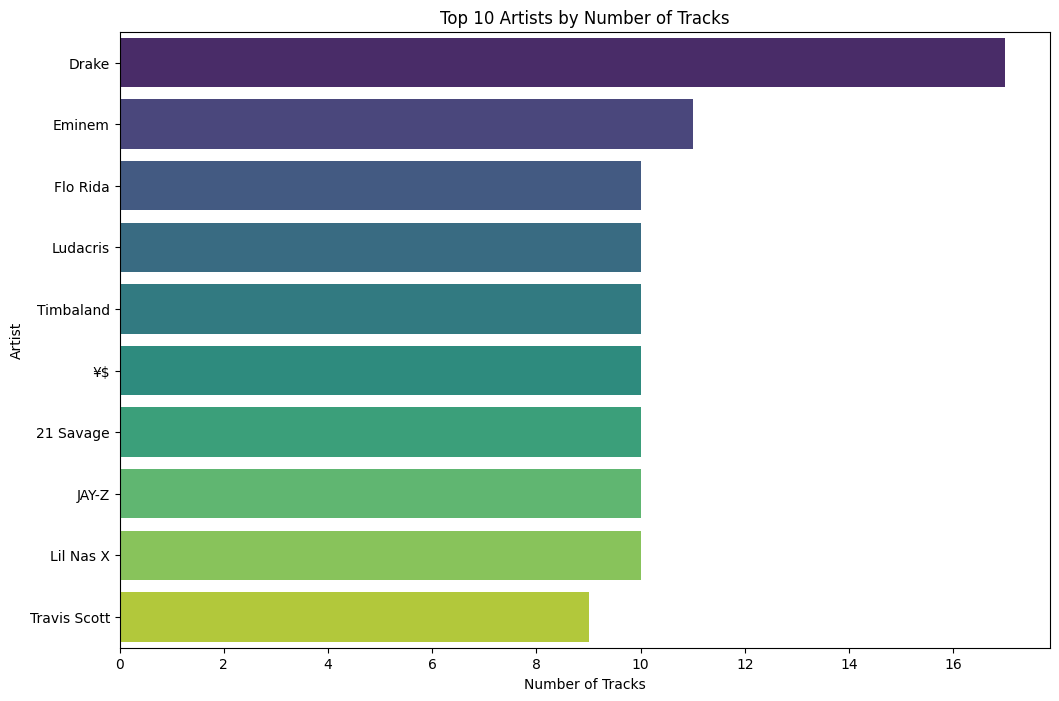

In [437]:
# Q4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot ?

plt.figure(figsize=(12, 8))
artist_count = sp_data['Artist'].value_counts()
sns.countplot(data=sp_data, y='Artist', order=artist_count.index[:10], palette="viridis")
plt.title("Top 10 Artists by Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.show()

In [438]:
# Q5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each ?

top_least_popular = sp_data.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print(top_least_popular)

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [439]:
# Q6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist ?

top_artists = sp_data['Artist'].value_counts().head(5).index
top_artists_avg_popularity = sp_data[sp_data['Artist'].isin(top_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print(top_artists_avg_popularity)


Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64


In [440]:
# Q7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

for artist in top_artists:
    top_track = sp_data[sp_data['Artist'] == artist].nlargest(1, 'Popularity')[['Track Name', 'Popularity']]
    print(f"Most popular track for {artist}:\n{top_track}\n")


Most popular track for Drake:
                                Track Name  Popularity
0  Rich Baby Daddy (feat. Sexyy Red & SZA)          92

Most popular track for Eminem:
    Track Name  Popularity
80  Without Me          90

Most popular track for Flo Rida:
             Track Name  Popularity
300  Low (feat. T-Pain)          84

Most popular track for Ludacris:
       Track Name  Popularity
371  My Chick Bad          67

Most popular track for Timbaland:
        Track Name  Popularity
380  The Way I Are          85



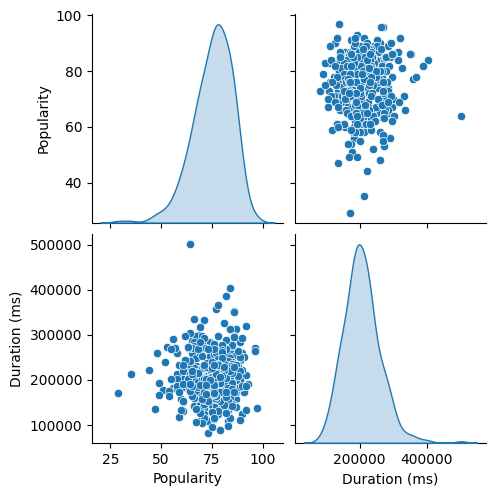

In [441]:
# Q8 Visualize relationships between multiple numerical variables simultaneously using a pair plot

sns.pairplot(sp_data[['Popularity', 'Duration (ms)']], diag_kind='kde')
plt.show()

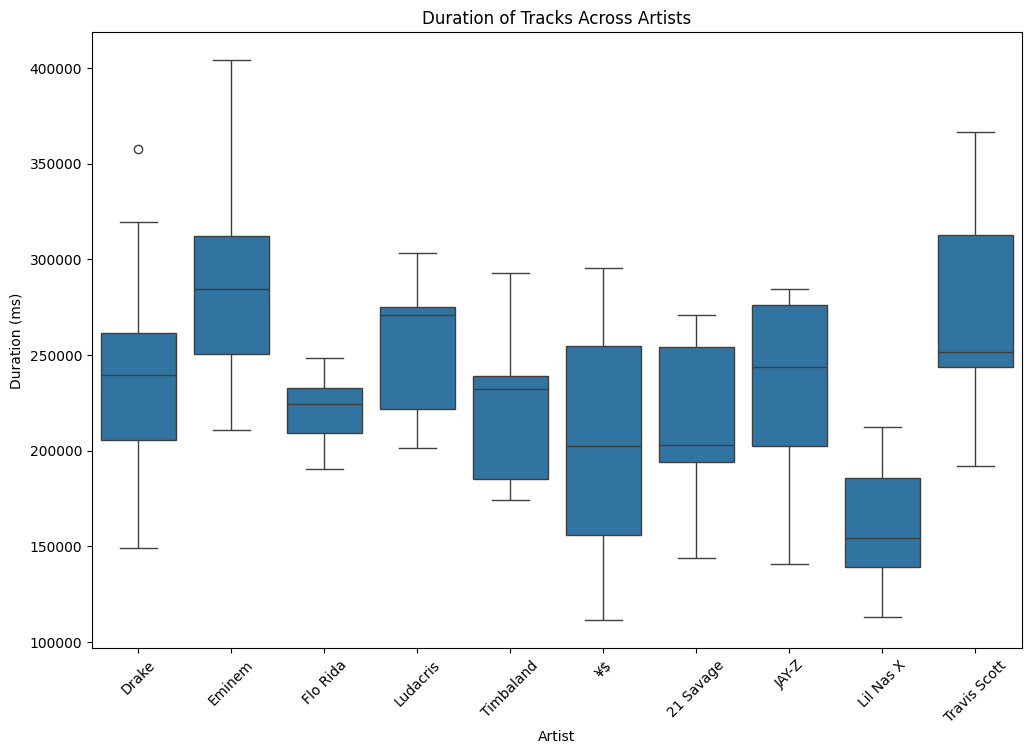

In [442]:
# Q9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

plt.figure(figsize=(12, 8))
sns.boxplot(data=sp_data, x='Artist', y='Duration (ms)', order=sp_data['Artist'].value_counts().index[:10])
plt.title("Duration of Tracks Across Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.xticks(rotation=45)
plt.show()

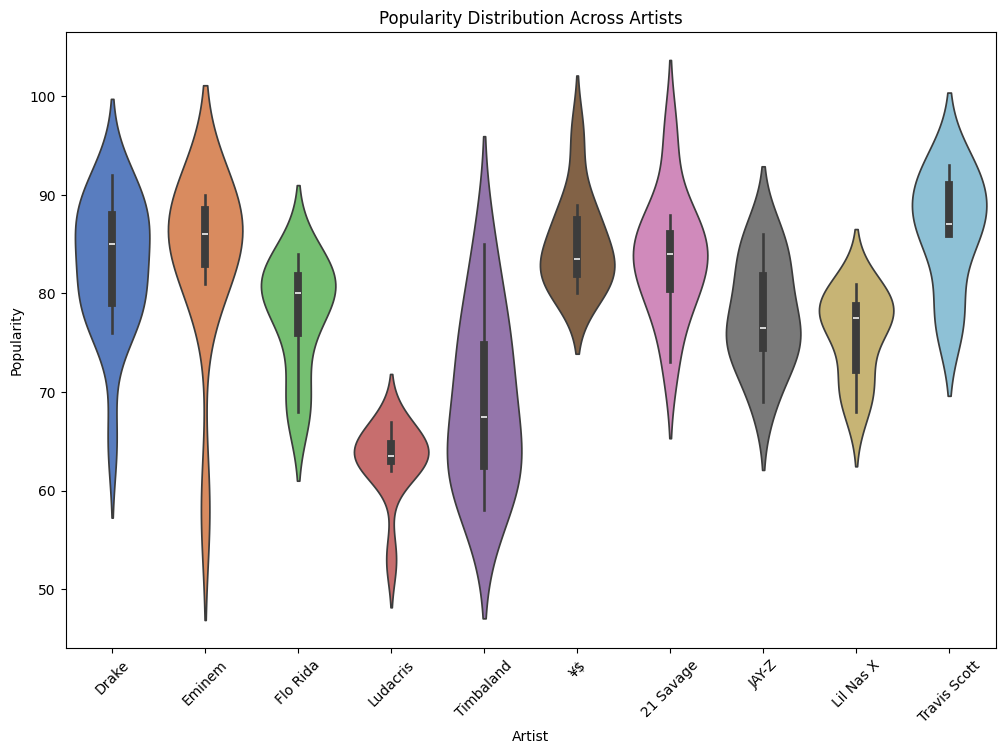

In [443]:
# Q10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

plt.figure(figsize=(12, 8))
sns.violinplot(data=sp_data, x='Artist', y='Popularity', order=sp_data['Artist'].value_counts().index[:10], palette="muted")
plt.title("Popularity Distribution Across Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.xticks(rotation=45)
plt.show()